**Web Scraping & Word Frequency**

'https://www.gutenberg.org/files/514/514-h/514-h.htm' # Little Women
'https://www.gutenberg.org/files/42671/42671-h/42671-h.htm' # Pride & Prejudice
'https://www.gutenberg.org/files/203/203-h/203-h.htm' # Uncle Tom's Cabin
'https://www.gutenberg.org/files/205/205-h/205-h.htm' # Walden

In [21]:
import requests
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline
sns.set()

In [4]:
url = "https://www.gutenberg.org/files/42671/42671-h/42671-h.htm"

In [6]:
req = requests.get(url)

In [8]:
html = req.text

**Wrangling Data**

In [9]:
gumbo = BeautifulSoup(html, 'html5lib')

In [10]:
gumbo.title.string

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen'

In [11]:
gumbo.findAll('a')[:5]

[<a href="http://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="http://www.pgdp.net">http://www.pgdp.net</a>,
 <a href="http://archive.org">http://archive.org</a>,
 <a href="http://archive.org/stream/novelstextbasedo02austuoft#page/n23/mode/2up">
       http://archive.org/stream/novelstextbasedo02austuoft#page/n23/mode/2up</a>,
 <a href="images/illus1big.jpg"><img alt="" src="images/illus1.jpg"/></a>]

In [12]:
text = gumbo.get_text()

**Extract Words**

In [13]:
sentence = "Peter piper picked a peck of picked peppers."

ps = 'p\w+'
re.findall(ps, sentence)

['piper', 'picked', 'peck', 'picked', 'peppers']

In [14]:
re.findall('\w+', sentence)

['Peter', 'piper', 'picked', 'a', 'peck', 'of', 'picked', 'peppers']

In [15]:
tokens = re.findall('\w+', text)
tokens[:10]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'Pride',
 'and',
 'Prejudice',
 'by',
 'Jane']

In [17]:
words = []

for word in tokens:
    words.append(word.lower())
    
words[:8]

['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice']

In [19]:
eng = nltk.corpus.stopwords.words('english')
eng[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [20]:
words_ns = []

for word in words:
    if word not in eng:
        words_ns.append(word)
        
words_ns[:5]

['project', 'gutenberg', 'ebook', 'pride', 'prejudice']

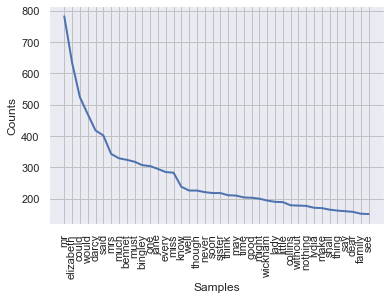

In [22]:
frequencydistribution1 = nltk.FreqDist(words_ns)
frequencydistribution1.plot(40)

In [23]:
# reusable function

def plot_word_freq(url, num=25):
    req = requests.get(url)
    html = req.text
    gumbo = BeautifulSoup(html, "html5lib")
    text = gumbo.get_text()
    tokens = re.findall('\w+', text)
    words = []
    
    for word in tokens:
        words.append(word.lower())
    eng = nltk.corpus.stopwords.words('english')
    words_ns = []
    
    for word in words:
        if word not in eng:
            words_ns.append(word)
    frequencydis1 = nltk.FreqDist(words_ns)
    frequencydis1.plot(num)

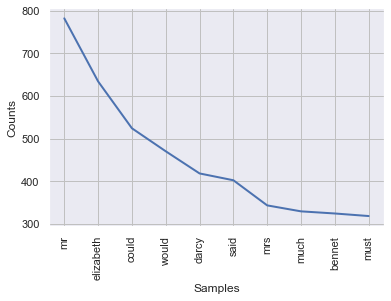

In [24]:
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm', 10)